**Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Rithul's Task:**
Handle the **Data Cleaning** and **Handling Noisy Data**. Start by examining
the dataset for any **missing values**, and use appropriate methods, such as **mean imputation**, to
handle them. Also, look for any **noisy data or outliers** that might affect our analysis and apply
**binning** or **outlier detection techniques** to handle them.

In [6]:
#Checking for missing values
missing_values = df.isnull()
missing_values



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Checking for duplicate values
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
new_bin                3
age_bin                5
dtype: int64

In [8]:
# Imputing missing values with the meanz
df.fillna(df.mean(), inplace=True)

missing_values = df.isnull().sum()
for col in missing_values.index:
    print(col, missing_values[col])

RowNumber 0
CustomerId 0
Surname 0
CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 0
Balance 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
EstimatedSalary 0
Exited 0


<ipython-input-8-b4fec9147a4e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Outlier Analysis

In [9]:
# Calculate the mean and standard deviation of each column
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()


In [ ]:
# Check for outliers
outliers = []
for column in df.columns:
    for index, row in df.iterrows():
        if row[column] > mean + 3 * std or row[column] < mean - 3 * std:
            outliers.append((index, row[column]))


In [ ]:
# Print the outliers
print(outliers)


[]


Binning

In [ ]:
#perform data binning on points variable using specific quantiles and labels
df['age_bin'] = pd.qcut(df['Age'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=['A', 'B', 'C', 'D', 'E'])

print(df)


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
#count frequency of each bin
df['age_bin'].value_counts()

A    2372
C    2266
E    1885
B    1781
D    1696
Name: age_bin, dtype: int64

In [ ]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
# Check if there are any additional relevant datasets that we can integrate

for column in df.columns:
    if column.startswith("external_"):
        print("Found an external dataset:", column)

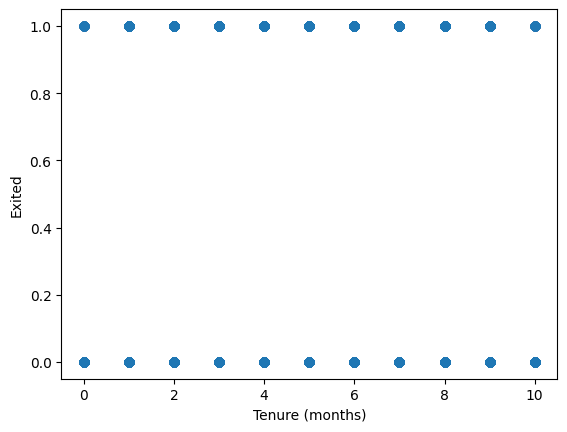

In [ ]:
# Create a scatter plot of tenure vs. churn
plt.scatter(df["Tenure"], df["Exited"])
plt.xlabel("Tenure (months)")
plt.ylabel("Exited")
plt.show()

In [ ]:
# Correlation analysis to identify all of the variables that are correlated with churn
correlations = df.corr()
print(correlations["Exited"])

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64


<ipython-input-45-a7491e2a3c28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [ ]:
# Removing columns that's not required
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'EstimatedSalary'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CreditScore     10000 non-null  int64   
 1   Age             10000 non-null  int64   
 2   Tenure          10000 non-null  int64   
 3   Balance         10000 non-null  float64 
 4   NumOfProducts   10000 non-null  int64   
 5   HasCrCard       10000 non-null  int64   
 6   IsActiveMember  10000 non-null  int64   
 7   Exited          10000 non-null  int64   
 8   new_bin         10000 non-null  category
 9   age_bin         10000 non-null  category
dtypes: category(2), float64(1), int64(7)
memory usage: 645.0 KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


Tanila's: Data
Scaling, Data Dimensionality
Reduction, and Feature Selection.
Apply the appropriate scaling
techniques, such as min-max
normalization or standardization, to
ensure numerical features are on a
similar scale. If the dataset has high
dimensionality, implement
dimensionality reduction techniques
like Principal Component Analysis
(PCA) to capture the most critical
information. Additionally, use feature
selection methods to identify the most relevant features for churn prediction

In [ ]:
# Check for high dimensionality
print("Number of features:", len(df.columns))

Number of features: 14


In [ ]:

# Select the numerical features you want to normalize
numerical_features = ['Balance', 'CreditScore', 'EstimatedSalary']


scaler = MinMaxScaler()


df[numerical_features] = scaler.fit_transform(df[numerical_features])



<Axes: >

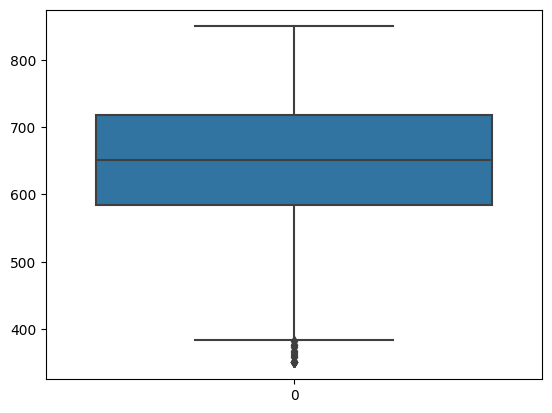

In [20]:
sns.boxplot(df['CreditScore'])

In [22]:
q = np.where(df['CreditScore']>718) or (df['CreditScore']<584)
w = np.array(q[0])
len(w)


2463

In [68]:
df=df.drop(columns='CustomerId', axis=1)
df=df.drop(columns='Surname', axis=1)
df=df.drop(columns='RowNumber', axis=1)

In [23]:
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))


In [52]:
drop_outlier(df,df['EstimatedSalary'])

(9974, 14)
New data shape post deletion: (9974, 14)


In [53]:
drop_outlier(df,df['Balance'])

(9974, 14)
New data shape post deletion: (9972, 14)


<ipython-input-18-bdb6c1144ab3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-18-bdb6c1144ab3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

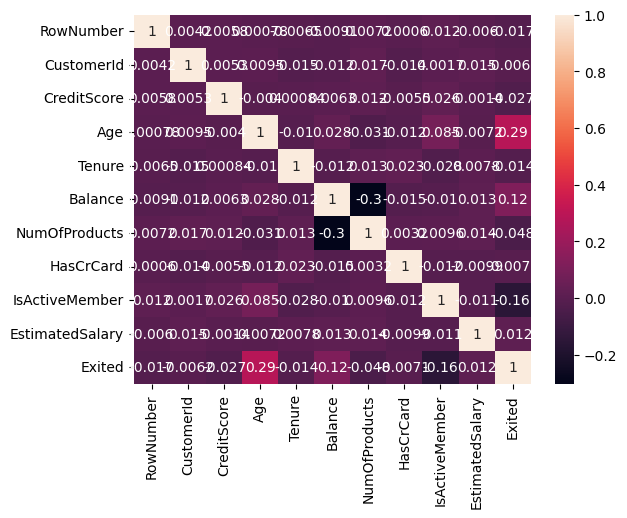

In [18]:
df.corr()
sns.heatmap(df.corr(),annot=True)

In [34]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


In [31]:
from sklearn.preprocessing import LabelEncoder
for col in ['Geography','Gender']:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [66]:
from sklearn.feature_selection import chi2
X=df.drop(columns=['Exited'])
Y=df['Exited']

<Axes: >

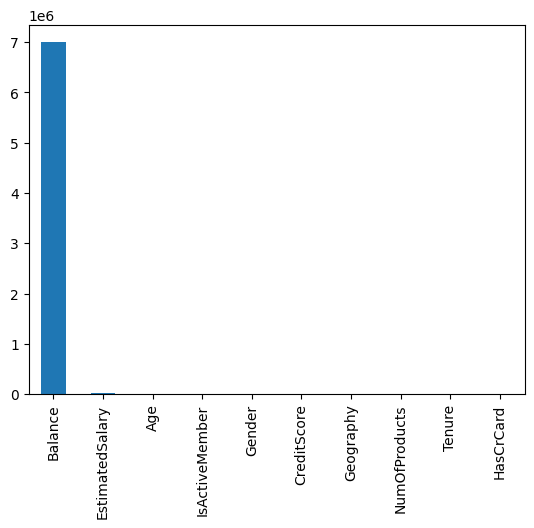

In [67]:
chi_scores=chi2(X,Y)
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

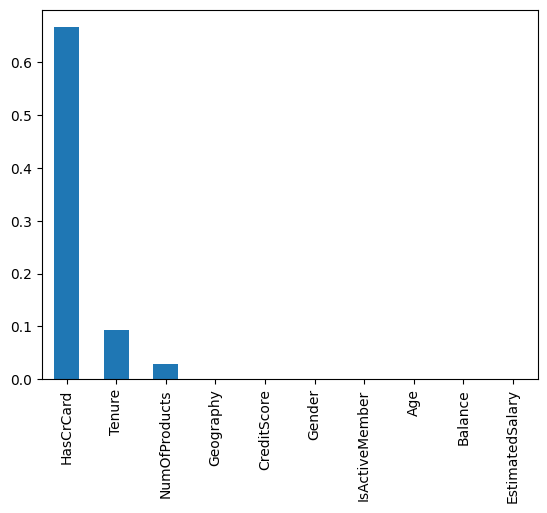

In [69]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()